In [1]:
# %load init_setup/setup.py
# ==- INITIAL SETUP -===============================================================================
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets

np.set_printoptions(formatter={'float': '{: 0.5f}'.format}, suppress = True)
matplotlib.rcParams.update({'font.size': 16})

# ==- PLOT PARAMETERS -=============================================================================
loglogalpha = 0.70
baralpha    = 0.85

plot_size = (14,8)
subplot_size = (7,4)

# ==- COLOR PALETTE -===============================================================================
c_red = "#e6194b" # red
c_gre = "#3cb44b" # green
c_yel = "#ffe119" # yellow
c_blu = "#4363d8" # blue
c_ora = "#f58231" # orange
c_pur = "#911eb4" # purple
c_cya = "#42d4f4" # cyan
c_mag = "#f032e6" # magenta
c_lim = "#bfef45" # lime
c_pin = "#fabebe" # pink
c_tea = "#469990" # teal
c_lav = "#e6beff" # lavender
c_bro = "#9A6324" # brown
c_bei = "#fffac8" # beige
c_mar = "#800000" # maroon
c_min = "#aaffc3" # mint
c_oli = "#808000" # olive
c_apr = "#ffd8b1" # apricot
c_nav = "#000075" # navy
c_gra = "#a9a9a9" # gray
c_whi = "#ffffff" # white
c_bla = "#000000" # black

accessibility_95    = [c_red, c_gre, c_blu, c_yel, c_ora, c_pur, c_cya,
                       c_mag, c_lim, c_pin, c_tea, c_lav, c_bro, c_bei,
                       c_mar, c_min, c_oli, c_apr, c_nav, c_gra, c_bla]
accessibility_99    = [c_red, c_gre, c_blu, c_yel, c_ora, c_cya, c_mag,
                       c_pin, c_tea, c_lav, c_bro, c_bei, c_mar, c_min,
                       c_nav, c_gra, c_bla]
accessibility_99_99 = [c_blu, c_yel, c_ora, c_pin, c_lav, c_mar, c_nav,
                       c_gra, c_bla]
accessibility_100   = [c_blu, c_yel, c_gra, c_bla]


In [2]:
# %load init_setup/setup2.py
matplotlib.rcParams.update({'font.size': 16})


In [7]:
# ==- SPECIAL GRADIENTS -===========================================================================
grad_7_red = np.array([c_red, "#ea3358", "#ed4d67", "#f06878", "#f3848d", "#f7a1a4", c_pin])
grad_7_gre = np.array([c_gre, "#4bc05d", "#5bcd70", "#6cda84", "#80e698", "#94f2ad", c_min])
grad_6_red = np.array([c_red, "#ea385a", "#ea576c", "#f17984", "#f69b9f", c_pin])
grad_6_gre = np.array([c_gre, "#4ec360", "#62d278", "#78e190", "#90f0a9", c_min])

In [4]:
def autolabel(ax, rects, vertical=False):
    if (vertical): rot = 270
    else:          rot = 0
        
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation=rot)
    return

def methods_plot(names, times, colors):
    x = np.arange(len(names))
    fig, ax = plt.subplots()
    fig.set_size_inches(plot_size)

    rects = plt.bar(x, times, color=colors, align="center", alpha=baralpha, label=names)
    autolabel(ax, rects)

    plt.xlabel("Method")
    plt.ylabel("CPU time [s]")
    plt.title("CPU time per method (10.000 events)")
    
    plt.tight_layout()
    ax.set_xticks(np.arange(len(names)))
    ax.set_xticklabels(names, rotation = -30, ha="left")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color=c_gra, linestyle='-', linewidth=0.25, alpha=0.5)
    
    plt.show()
    return

def methods_contrast_plot(names, times, colors, labels):
    width = 0.35
    x = np.arange(len(names))
    fig, ax = plt.subplots()
    fig.set_size_inches(plot_size)
    
    rects_arr = []
    rects_arr.append(ax.bar(x - width/2, times[0], width, label=labels[0], color=colors[0]))
    rects_arr.append(ax.bar(x + width/2, times[1], width, label=labels[1], color=colors[1]))
    for rects in rects_arr:
        autolabel(ax, rects, True)
    
    ax.set_xlabel("Method")
    ax.set_xticks(np.arange(len(names)))
    ax.set_xticklabels(names, rotation = -30, ha="left")
    ax.set_ylabel("CPU time [s]")
    ax.set_title("CPU time per method (10.000 events)")
    
    plt.tight_layout()
    plt.legend()
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(color=c_gra, linestyle='-', linewidth=0.25, alpha=0.5)
    
    plt.show()
    return

# version 1.0

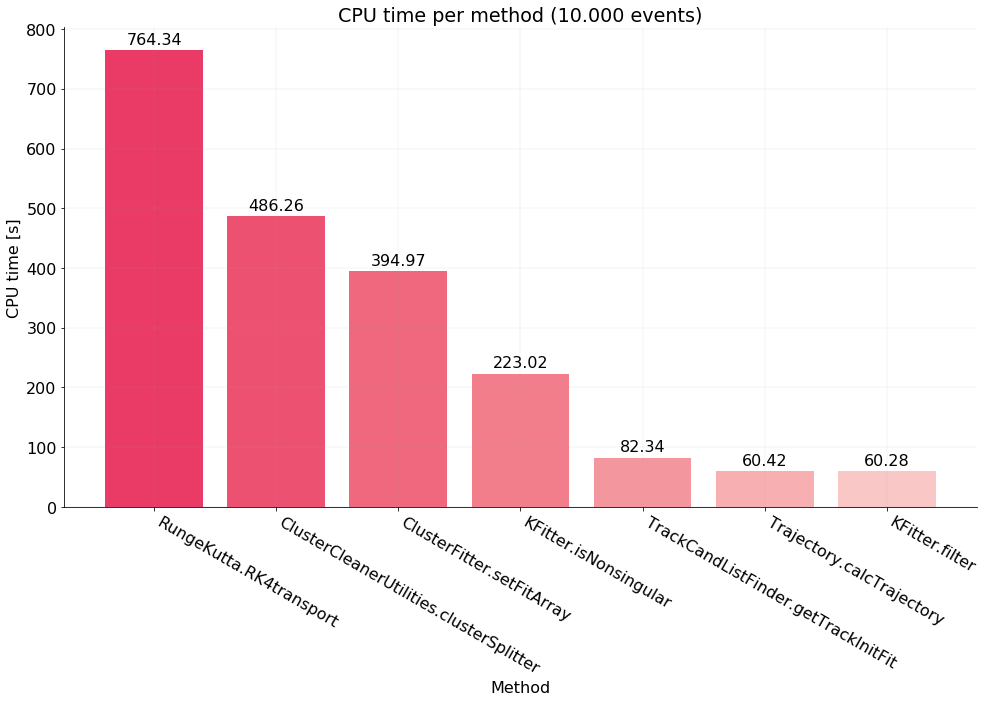

In [10]:
names = [
    "RungeKutta.RK4transport",
    "ClusterCleanerUtilities.clusterSplitter",
    "ClusterFitter.setFitArray",
    "KFitter.isNonsingular",
    "TrackCandListFinder.getTrackInitFit",
    "Trajectory.calcTrajectory",
    "KFitter.filter",
]
times = [764.34, 486.26, 394.97, 223.02,  82.34,  60.42,  60.28]

methods_plot(names, times, grad_7_red)

# version 1.1

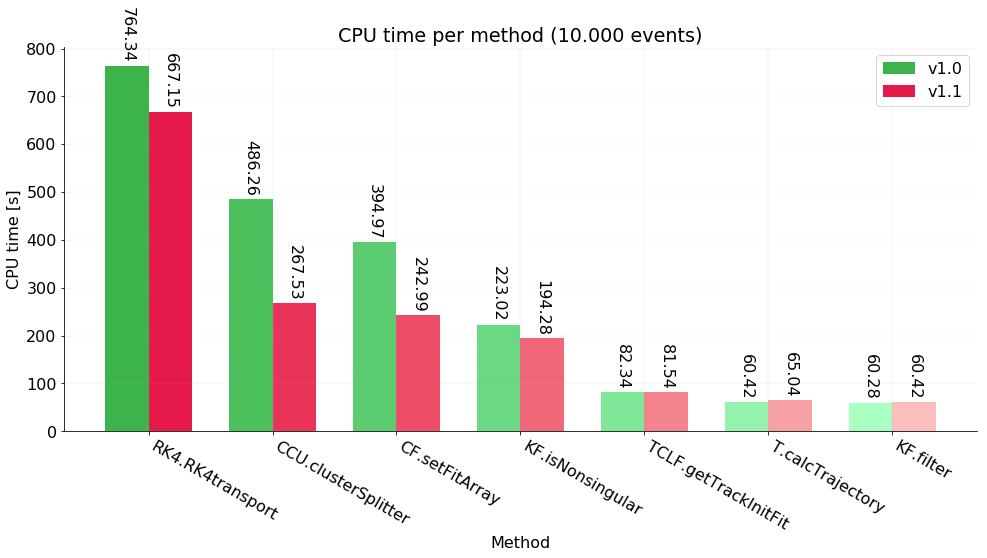

In [11]:
methods = ["RK4.RK4transport",
           "CCU.clusterSplitter",
           "CF.setFitArray",
           "KF.isNonsingular",
           "TCLF.getTrackInitFit",
           "T.calcTrajectory",
           "KF.filter"
          ]                     
old_time = np.array([764.34, 486.26, 394.97, 223.02,  82.34,  60.42,  60.28])
new_time = np.array([667.15, 267.53, 242.99, 194.28,  81.54,  65.04,  60.42])

methods_contrast_plot(methods, (old_time, new_time), (grad_7_gre, grad_7_red), ("v1.0", "v1.1"))

# version 1.2

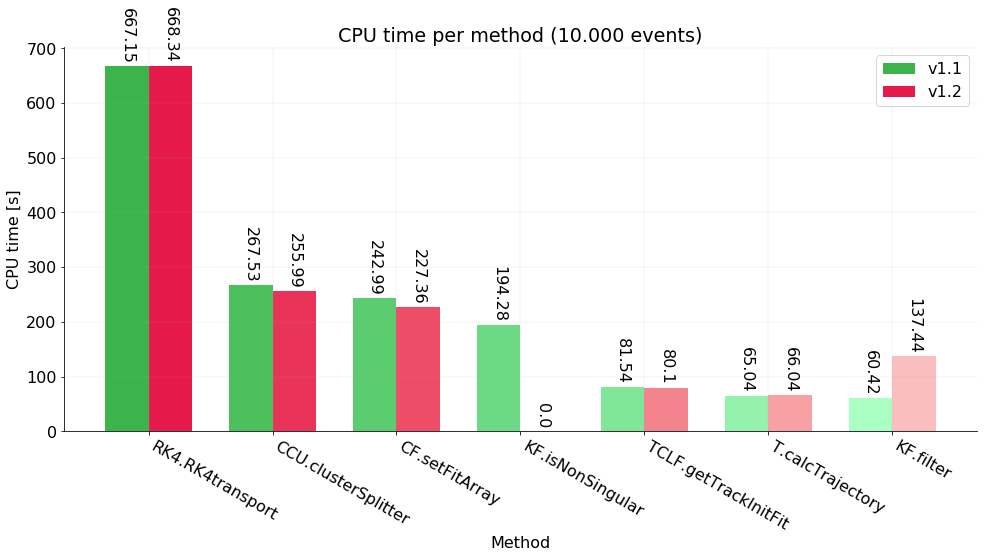

In [12]:
methods = ["RK4.RK4transport",
           "CCU.clusterSplitter",
           "CF.setFitArray",
           "KF.isNonSingular",
           "TCLF.getTrackInitFit",
           "T.calcTrajectory",
           "KF.filter"
          ]
old_time = np.array([667.15, 267.53, 242.99, 194.28,  81.54,   65.04,  60.42])
new_time = np.array([668.34, 255.99, 227.36, 0,       80.10,   66.04, 137.44])

methods_contrast_plot(methods, (old_time, new_time), (grad_7_gre, grad_7_red), ("v1.1", "v1.2"))

# RungeKutta times

In [1]:
# % FieldProbe.contains()         : 160.52 ms
# % TorusProbe.fieldCylindrical() : 119.84 ms
# % MagneticField.getB3()         : 115.07 ms
# % RungeKutta.RK4transport()     : 107.17 ms
# % RotatedCompositeProbe.field() : 106.36 ms
# % TorusProbe.relativePhi()      :  76.01 ms
# % CompositeProbe.field()        :  60.40 ms
# % Cell3D.reset()                :  46.76 ms
# % SolenoidProbe.field()         :  31.82 ms
# % Cell2D.calculate()            :  29.36 ms

names = [
    "FieldProbe.contains",
    "TorusProbe.fieldCylindrical",
    "MagneticField.getB3",
    "RungeKutta.RK4transport",
    "RotatedCompositeProbe.field",
    "TorusProbe.relativePhi",
    "CompositeProbe.field",
    "Cell3D.reset",
    "others"
]
times = [160.52, 119.84, 115.07, 107.17, 106.36, 76.01, 60.40, 46.76, 61.18]

methods_plot(names, times, grad_9_red)

NameError: name 'methods_plot' is not defined

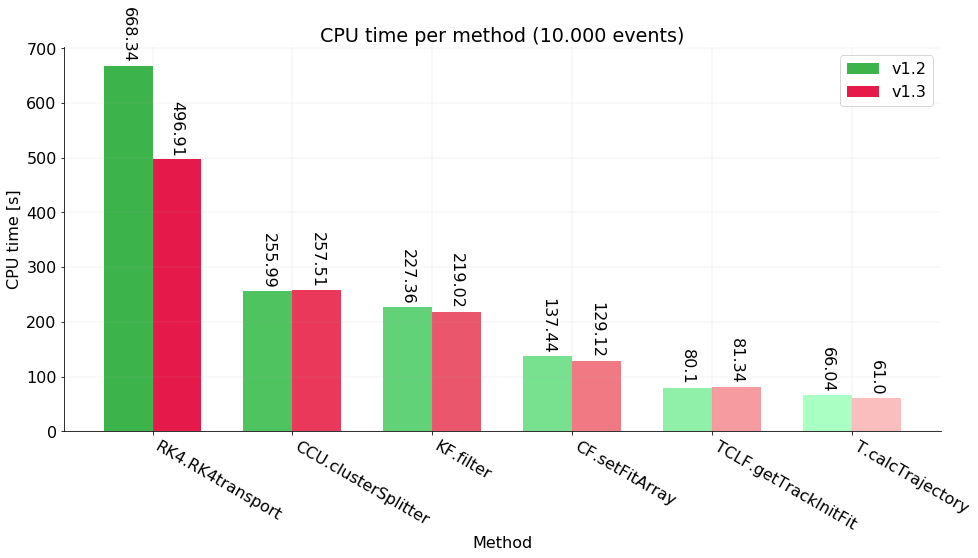

In [9]:
methods = ["RK4.RK4transport",
           "CCU.clusterSplitter",
           "KF.filter",
           "CF.setFitArray",
           "TCLF.getTrackInitFit",
           "T.calcTrajectory"
          ]
old_time = np.array([668.34, 255.99, 227.36, 137.44,  80.10,   66.04])
new_time = np.array([496.91, 257.51, 219.02, 129.12,  81.34,   61.00])

methods_contrast_plot(methods, (old_time, new_time), (grad_6_gre, grad_6_red), ("v1.2", "v1.3"))